# Calculate mean precipitation per subcatchment

This Notebook calculates the mean of the radar precipitation forcing per subcatchment. For each time step, the mean precipitation is calculated per subcatchment.

## Import required packages

In [1]:
import xarray as xr
import geopandas as gpd
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytz

C:\Users\924259\AppData\Local\Temp\ipykernel_11880\30543826.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


## Load the shapefile of the subcatchments

In [2]:
shapeloc = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Precipitation - NRR\Subcatchments"

In [3]:
gdf = gpd.read_file(f'{shapeloc}/GEU_Qstrgbd.shp')

### Set the CRS to EPSG: 4326

In [4]:
gdf.to_crs(4326, inplace=True)

## Calibration period

#### Open the precipitation dataset of the calibration period

In [5]:
nc_file = r"C:\Users\924259\Documents\NRR_output_calibration\NRR_data_calibration_adjusted.nc"
ds_cal = xr.open_dataset(nc_file)

#### Calculate the mean precipitation values per subcatchment

In [6]:
mean_precip_values_per_area = []

# Define the desired shape based on the NetCDF data's dimensions
desired_shape = ds_cal['precipitation'].isel(time=0).shape[-2:]

# Step 3: Calculate the mean precipitation per area and per timestep
for idx, row in gdf.iterrows():
    polygon = row['geometry']
    
    # Initialize an empty mask with the desired shape
    mask = np.zeros(desired_shape, dtype=bool)
    
    # Use rasterio.mask.geometry_mask to create a mask for the polygon
    mask = rasterio.mask.geometry_mask([polygon], out_shape=mask.shape, transform=ds_cal.rio.transform())
    
    # Reverse mask, subcatchment of interest is set True
    mask = ~mask
    
    # Apply the mask to each timestep and calculate the mean precipitation
    mean_precip_values_per_timestep = []
    for time_idx in range(ds_cal.dims['time']):
        masked_data = ds_cal['precipitation'].isel(time=time_idx).where(mask)
        mean_precip_value = np.nanmean(masked_data)
        mean_precip_values_per_timestep.append(mean_precip_value)
    
    # Store the mean precipitation values per timestep for the current area
    mean_precip_values_per_area.append(mean_precip_values_per_timestep)

# Step 4: Add the mean precipitation values per timestep to the GeoDataFrame as a new column
gdf['mean_precipitation_per_timestep'] = mean_precip_values_per_area

# Now, 'gdf' contains a new column 'mean_precipitation_per_timestep' with the mean values per timestep for each area.
print(gdf)

        Qmeter       A_ha    Shape_Leng    Shape_Area  \
0  Sippenaeken  12330.665  48981.048619  1.233066e+08   
1    Hommerich   3085.801  26032.302283  3.085801e+07   
2     Meerssen   8171.443  67673.767766  8.171443e+07   
3    Eyserbeek   2711.808  31903.689180  2.711808e+07   
4   Selzerbeek   2874.285  28931.939955  2.874285e+07   
5         Gulp   4605.371  43303.162816  4.605371e+07   

                                            geometry  \
0  POLYGON ((5.97782 50.75779, 5.97802 50.75767, ...   
1  POLYGON ((5.91790 50.80742, 5.91974 50.80686, ...   
2  POLYGON ((5.79263 50.91687, 5.79339 50.91633, ...   
3  POLYGON ((5.99215 50.85195, 5.99231 50.85180, ...   
4  POLYGON ((5.96102 50.81920, 5.96130 50.81915, ...   
5  POLYGON ((5.87040 50.82392, 5.87061 50.82365, ...   

                     mean_precipitation_per_timestep  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

## Validation period

#### Open the precipitation dataset of the validation period

In [9]:
nc_file = r"C:\Users\924259\Documents\NRR_output_validation\NRR_data_validation_adjusted.nc"
ds_val = xr.open_dataset(nc_file)

#### Calculate the mean precipitation values per subcatchment

In [10]:
mean_precip_values_per_area = []

# Define the desired shape based on the NetCDF data's dimensions
desired_shape = ds_val['precipitation'].isel(time=0).shape[-2:]

# Step 3: Calculate the mean precipitation per area and per timestep
for idx, row in gdf.iterrows():
    polygon = row['geometry']
    
    # Initialize an empty mask with the desired shape
    mask = np.zeros(desired_shape, dtype=bool)
    
    # Use rasterio.mask.geometry_mask to create a mask for the polygon
    mask = rasterio.mask.geometry_mask([polygon], out_shape=mask.shape, transform=ds_val.rio.transform())
    
    # Reverse mask, subcatchment of interest is set True
    mask = ~mask
    
    # Apply the mask to each timestep and calculate the mean precipitation
    mean_precip_values_per_timestep = []
    for time_idx in range(ds_val.dims['time']):
        masked_data = ds_val['precipitation'].isel(time=time_idx).where(mask)
        mean_precip_value = np.nanmean(masked_data)
        mean_precip_values_per_timestep.append(mean_precip_value)
    
    # Store the mean precipitation values per timestep for the current area
    mean_precip_values_per_area.append(mean_precip_values_per_timestep)

# Step 4: Add the mean precipitation values per timestep to the GeoDataFrame as a new column
gdf['mean_precipitation_per_timestep_val'] = mean_precip_values_per_area

# Now, 'gdf' contains a new column 'mean_precipitation_per_timestep' with the mean values per timestep for each area.
print(gdf)

        Qmeter       A_ha    Shape_Leng    Shape_Area  \
0  Sippenaeken  12330.665  48981.048619  1.233066e+08   
1    Hommerich   3085.801  26032.302283  3.085801e+07   
2     Meerssen   8171.443  67673.767766  8.171443e+07   
3    Eyserbeek   2711.808  31903.689180  2.711808e+07   
4   Selzerbeek   2874.285  28931.939955  2.874285e+07   
5         Gulp   4605.371  43303.162816  4.605371e+07   

                                            geometry  \
0  POLYGON ((5.97782 50.75779, 5.97802 50.75767, ...   
1  POLYGON ((5.91790 50.80742, 5.91974 50.80686, ...   
2  POLYGON ((5.79263 50.91687, 5.79339 50.91633, ...   
3  POLYGON ((5.99215 50.85195, 5.99231 50.85180, ...   
4  POLYGON ((5.96102 50.81920, 5.96130 50.81915, ...   
5  POLYGON ((5.87040 50.82392, 5.87061 50.82365, ...   

                     mean_precipitation_per_timestep  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

## Area mean

### Create Dataframe with the mean precipitation data per timestep per subcatchment for the calibration period

In [13]:
cal_mean = pd.DataFrame()

cal_mean['time'] = ds_cal.time.values
cal_mean.set_index('time',inplace = True)
cal_mean['Hommerich'] = gdf['mean_precipitation_per_timestep'][1]
cal_mean['Selzerbeek'] = gdf['mean_precipitation_per_timestep'][4]
cal_mean['Eyserbeek'] = gdf['mean_precipitation_per_timestep'][3]
cal_mean['Sippenaeken'] = gdf['mean_precipitation_per_timestep'][0]
cal_mean['Meerssen'] = gdf['mean_precipitation_per_timestep'][2]
cal_mean['Gulp'] = gdf['mean_precipitation_per_timestep'][5]

### Create Dataframe with the mean precipitation data per timestep per subcatchment for the validation period

In [14]:
val_mean = pd.DataFrame()

val_mean['time'] = ds_val.time.values
val_mean.set_index('time',inplace = True)
val_mean['Hommerich'] = gdf['mean_precipitation_per_timestep_val'][1]
val_mean['Selzerbeek'] = gdf['mean_precipitation_per_timestep_val'][4]
val_mean['Eyserbeek'] = gdf['mean_precipitation_per_timestep_val'][3]
val_mean['Sippenaeken'] = gdf['mean_precipitation_per_timestep_val'][0]
val_mean['Meerssen'] = gdf['mean_precipitation_per_timestep_val'][2]
val_mean['Gulp'] = gdf['mean_precipitation_per_timestep_val'][5]

## Check data

<Axes: xlabel='time'>

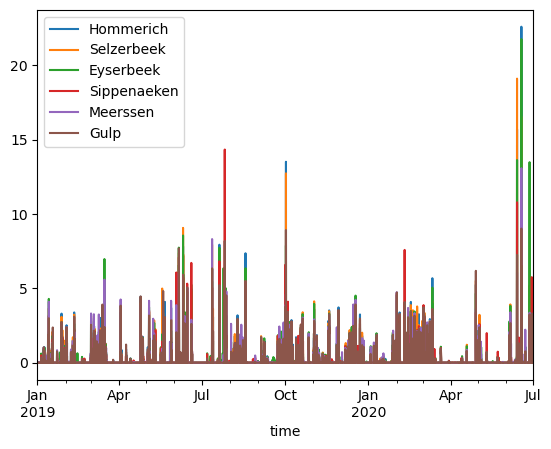

In [17]:
cal_mean.plot()

<Axes: xlabel='time'>

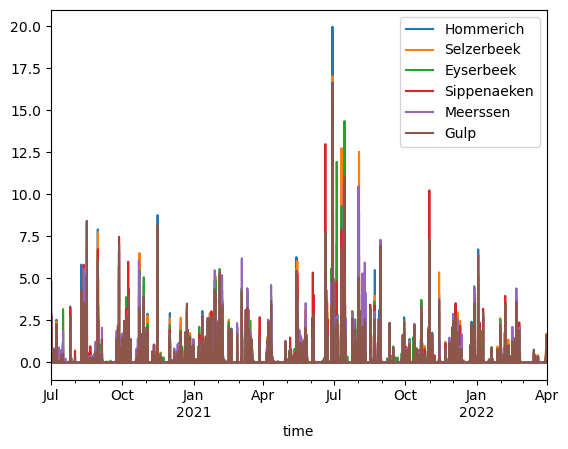

In [18]:
val_mean.plot()

## Save the calibration and validation precipitation data

In [21]:
cal_mean.to_csv(f'{shapeloc}/calibration_precipitation_mean.csv')

In [22]:
val_mean.to_csv(f'{shapeloc}/validation_precipitation_mean.csv')